# The equations of stellar structure and evolution

## Pen & paper exercises

### Constant density star 

Consider a star with constant density,

$$\rho(m)=\rho_\mathrm{c},\quad m(r) =\frac{4\pi}{3}r^3 \rho_\mathrm{c}.$$

Use the equation of hydrostatic equilibrium in its Eularian form,

$$\frac{\partial P}{\partial r} = -\rho g=-\frac{\rho G m(r)}{r^2},$$

to obtain the interior pressure of the star as a function of the central pressure $P_\mathrm{c}$ and $r/R$, where $R$ is the total radius of the star. Assume that the pressure at the surface of the star is much smaller than the central pressure.

### Lower bound on central pressure of the Sun

Using the Lagrangian form of the equation of hydrostatic equilibrium,

$$\frac{\partial P}{\partial m}=-\frac{Gm}{4\pi r^4},$$

place a lower bound on the central density of the sun by making use of the basic property that anywhere within the stellar interior we have that $r<R_\odot$.

### Dynamical instability

Consider a polytropic equation of state of the form

$$P = C \rho^\gamma,$$

where $C$ is a constant. If the density of a fluid element is perturbed slightly by an amount $\delta \rho\ll\rho$, then the pressure is perturbed by an amount

$$P_0+\delta P = C (\rho_0+\delta\rho)^\gamma \simeq C\rho_0^\gamma\left(1+\frac{\gamma \delta\rho}{\rho_0}\right),$$

where $P_0$ and $r_0$ are the unperturbed values of pressure and density. It follows that the perturbations on density and pressure can be related to each other:

$$\frac{\delta P}{P_0}=\gamma\frac{\delta \rho}{\rho_0}.$$

Using this answer the following questions:

- If the radii $r_0(m)$ of each mass shell in a star is perturbed by $\delta r=\alpha r_0$ (where $\alpha\ll 1$ is a small positive number independent of $m$), show that the stellar density is perturbed at each point by an amount $\delta \rho/\rho_0=3\alpha$ at each point of the star. To do this, take the continuity equation of the unperturbed fluid,  

    $$\frac{\partial r_0}{\partial m}=\frac{1}{4\pi\rho_0 r_0^2},$$

    and find $\delta \rho/\rho_0$ from its perturbed form  

    $$\frac{\partial (r_0+\alpha r_0)}{\partial m}=\frac{1}{4\pi(\rho_0+\delta \rho) (r_0+\alpha r_0)^2},$$

    by ignoring perturbation terms of quadratic order.

- Assume the unperturbed star is in hydrostatic equilibrium,  

    $$\frac{1}{4\pi r_0^2}\frac{\partial^2 r_0}{\partial t^2}=-\frac{\partial P_0}{\partial m}-\frac{G m}{4\pi r_0^4}=0.$$

    Compute the resulting acceleration after the perturbation $\delta r=\alpha r_0$. For which values of $\gamma$ does the resulting acceleration point inwards or outwards? What does this say about stability?

### Mass-Radius relationship for a polytrope

The structure of a star with a polytropic equation of state $P=C \rho^{1+1/n}$ can be computed using the Lane-Emden equation,

$$\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2\frac{d\theta_n}{d\xi}\right)=-\theta_n^n,$$

where

$$\rho=\rho_\mathrm{c}\theta_n^n, \quad P=P_c \theta_n^{1+n}, \quad r = r_n \xi, \quad r_n^2\equiv\frac{(n+1)P_\mathrm{c}}{4\pi G \rho_\mathrm{c}^2}.$$

The central boundary conditions for this equation are $\theta_n(0)=1$ and $\theta_n'(0)=0$, while the surface is defined by the first zero of $\theta_n$, at which point we define $\xi_1$.

- Show that the mass contained inside a given value of the coordinate $\xi$ is given by  
$m(\xi)=4\pi r_n^3 \rho_\mathrm{c}(-\xi^2 \theta_n'(\xi)).$
- Show that for an equation of state $P=C\rho^{5/3}$ higher mass stars have smaller radii.

## Computational exercises

Let's compute some numerical solutions to the Lane-Embden equation. A good reference which was used in the development of this exercise is the book by {cite}`Hansen+2004`.

In [105]:
using Plots
using LaTeXStrings

By defining the variables $x=\xi$, $y=d\theta_n/d\xi$ and $z=dy/dx$, the Lane-Emden equation can be written as two first-order differential equations:

$$y' = z$$
$$z' = -y^n -\frac{2}{x}z.$$

To numerically solve a continuous differential equation with a computer we need to rely on a discretization. For example, if we evaluate $x$ in discrete steps enumerated by $i$ with a spacing $\Delta x$, we have that:

$$x_i = i\Delta x.$$

In terms of this discretization, the pair of differential equations above can be approximated as:

$$\frac{y_{i+1}-y_i}{\Delta x}=z_i$$
$$\frac{z_{i+1}-z_i}{\Delta x}=-y_i^n - \frac{2}{x_i} z_i.$$

This is known as the Euler method, and it lets us compute the values at cell $i+1$ once we know the value at cell $i$. To integrate these equations we will instead use a more precise method known as a fourth-order Runge-Kutta solver. The values at cell $i+1$ are obtained in this method as

$$y_{i+1} = y_i +\frac{k_1}{6}+\frac{k_2}{3}+\frac{k_3}{3}+\frac{k_4}{6}$$
$$z_{i+1} = z_i +\frac{l_1}{6}+\frac{l_2}{3}+\frac{l_3}{3}+\frac{l_4}{6},$$

where

$$k_1 = \Delta x\times y'(x_i,y_i,z_i)$$
$$l_1 = \Delta x\times z'(x_i,y_i,z_i)$$
$$k_2 = \Delta x\times y'(x_i+\Delta x/2,y_i+k_1/2,z_i+l_1/2)$$
$$l_2 = \Delta x\times z'(x_i+\Delta x/2,y_i+k_1/2,z_i+l_1/2)$$
$$k_3 = \Delta x\times y'(x_i+\Delta x/2,y_i+k_2/2,z_i+l_2/2)$$
$$l_3 = \Delta x\times z'(x_i+\Delta x/2,y_i+k_2/2,z_i+l_2/2)$$
$$k_4 = \Delta x\times y'(x_i+\Delta x,y_i+k_3,z_i+l_3)$$
$$l_4 = \Delta x\times z'(x_i+\Delta x,y_i+k_3,z_i+l_3).$$

The objective is then to start from the center of the star and integrate outwards until we reach the first zero of $y$, which represents the stellar surface. One complication however is that the differential equation for $z'$ is undefined at the center $(x=0)$. This can be circumvented by using a series approximation near the center, which is straightforward to derive using the boundary conditions:

$$y(\xi)=1-\frac{1}{6}\xi^2 +\frac{n}{120}\xi^4 -\frac{n(8n-5)}{15120}\xi^6+\mathcal{O}(\xi^8).$$

In the code cell below we define the differential equations as well as a method to do a single Runge-Kutta step, which returns a tuple with the new $(y,z)$ values in the following cell. We also define the function that approximates $y$ and $z$ for small $\xi$.

In [106]:
dydx(x,y,z,n) = z
dzdx(x,y,z,n) = -y^n-2*z/x

function RK_step(x,y,z,n,Δx)
    k₁ = Δx*dydx(x,y,z,n)
    l₁ = Δx*dzdx(x,y,z,n)

    k₂ = Δx*dydx(x+Δx/2,y+k₁/2,z+l₁/2,n)
    l₂ = Δx*dzdx(x+Δx/2,y+k₁/2,z+l₁/2,n)

    k₃ = Δx*dydx(x+Δx/2,y+k₂/2,z+l₂/2,n)
    l₃ = Δx*dzdx(x+Δx/2,y+k₂/2,z+l₂/2,n)

    k₄ = Δx*dydx(x+Δx,y+k₃,z+l₃,n)
    l₄ = Δx*dzdx(x+Δx,y+k₃,z+l₃,n)

    return (
        y+k₁/6+k₂/3+k₃/3+k₄/6,
        z+l₁/6+l₂/3+l₃/3+l₄/6,
        )
end

y_smallx(x,n) = 1 - 1/6*x^2 + n/120*x^4 -n*(8*n-5)/1520*x^6
z_smallx(x,n) = - 1/3*x + n/30*x^3 -3*n*(8*n-5)/760*x^5

z_smallx (generic function with 1 method)

Now we will integrate these equations. We start at a small of $x$ and integrate the equations until $x=20$ (hoping we find a zero by then). In here you need to update `yvals[i]` and `zvals[i]` inside the for loop.

In [107]:
# setup grid in x
Δx = 1e-4
n = 5
nsteps = 200_000
xvals = LinRange(Δx,Δx*nsteps,nsteps)

# initialize first value of y and z using series approximation
yvals = zeros(nsteps);zvals = zeros(nsteps)
yvals[1] = y_smallx(Δx, n)
zvals[1] = z_smallx(Δx, n)

# Perform the Runge-Kutta integration
for i in 2:nsteps
    # ADD YOUR CODE HERE
end

In order to verify your results, plot them together with the analytic solutions that are known for $n=0,1$ and $5$. These solutions are:

$$\theta_0 = 1-\frac{\xi^2}{6}$$
$$\theta_1 = \frac{\sin \xi}{\xi}$$
$$\theta_5 = \frac{1}{\sqrt{1+\xi^2/3}}$$

Once you complete the code in the cell above you can uncomment the relevant lines in the following cell to do this.

In [108]:
#plot(xlabel=L"$x$", ylabel=L"$y$")
#plot!(xvals, 1 .- xvals.^2 ./ 6) #solution for n=0
#plot!(xvals, sin.(xvals)./xvals, linewidth=4) #solution for n=1
#plot!(xvals, 1 ./ sqrt.(1 .+ xvals.^2 ./3))    #solution for n=5
#plot!(xvals, yvals, linewidth=6, linestyle=:dash)

With a solution in hand, locate the first zero crossing for arbitrary integer values of $n$ between $0$ and $4$. A useful property to compute that characterizes each polytrope is the ratio of central to average density, which can be shown to be equal to:

$$\frac{\rho_c}{\langle \rho \rangle}=\frac{1}{3}\left(\frac{\xi_1}{-\theta_n'(\xi_1)}\right).$$

Make a plot of this quantity versus the polytropic index $n$.

## Solution to pen & paper exercises

### Constant density star

Using the expression of $m(r)$ we can write the hydrostatic equilibrium equation as,

$$\frac{\partial P}{\partial r} = -\frac{4\pi \rho_c^2 G}{3} r,$$

which can be integrated from the core to the surface

$$\int_0^R \frac{\partial P}{\partial r} dr = P_\mathrm{s} - P_\mathrm{c}=-\frac{4\pi \rho_c^2 G}{6} R^2.$$

Ignoring the surface pressure $P_\mathrm{s}$ we obtain the central density of the star

$$P_c = \frac{4\pi \rho_c^2 G}{6} R^2.$$

The pressure at an arbitrary radius can be obtained by changing the integration limits

$$\int_0^r \frac{\partial P}{\partial r} dr = P(r) - P_\mathrm{c}=-\frac{4\pi \rho_c^2 G}{6} (r^2-R^2)=P_\mathrm{c}(1-r^2/R^2).$$

### Lower bound on central pressure of the Sun

We can integrate the equation over mass, again ignoring central pressure:

$$\int_0^{M} \frac{\partial P}{\partial m} dm = -P_\mathrm{c}=-\int_0^{M} \frac{Gm}{4\pi r^4}$$

Since $r<R$, we can place a bound on the integral by replacing $r$ with $R$,

$$P_\mathrm{c} > \int_0^{M} \frac{Gm}{4\pi R^4}=\frac{GM^2}{8\pi R^4}.$$

It is quite common to write expressions like this for any star, but scaled to the properties of the Sun. We can do this by evaluating the expression for the solar radius and mass, while keeping the relevant power laws on mass and radius:

$$P_\mathrm{c}=\frac{GM^2}{8\pi R^4}\left(\frac{M}{M_\odot}\right)^2\left(\frac{R}{R_\odot}\right)^{-4}\simeq 4.5\times 10^{14}\;\mathrm{[dyne\;cm^{-2}]} \left(\frac{M}{M_\odot}\right)^2\left(\frac{R}{R_\odot}\right)^{-4}.$$

Considering one atmosphere is $\sim 10^6\;\mathrm{dyne\;cm^{-2}}$, this means the core of the sun has over eight orders of magnitude higher pressure than we get on our daily lives!

### Dynamical instability

We start by noting that:

$$\frac{1}{(r_0+\alpha r_0)^2} = \frac{1}{r_0^2(1+\alpha)^2}=\frac{1-2\alpha}{r_0^2}$$

and

$$\frac{1}{\rho_0+\delta \rho} = \frac{1}{\rho_0(1+\delta \rho/\rho_0)}=\frac{1-\delta \rho/\rho}{\rho_0}.$$

The continuity equation then reads as

$$\frac{\partial r_0}{\partial m}(1+\alpha)=\frac{1}{4\pi r_0^2 \rho_0}(1-2\alpha)(1-\delta\rho/\rho_0),$$

and replacing $\partial r_0/\partial m$ with the unperturbed continuity equation, while ignoring quadratic perturbation terms, gives us the desired result:

$$\frac{\delta \rho}{\rho_0}=-3\alpha,$$

which as expected is negative (a lowering of density) with expansion. With this we immediately know that $\delta P/P_0=-3\alpha\gamma$. Next we want to obtain the sign of the acceleration after the perturbation,

$$\frac{1}{4\pi (r_0+\alpha r_0)^2}\frac{\partial^2 r_0}{\partial t^2} = -\frac{\partial P_0}{\partial m}(1-3\alpha\gamma) - \frac{Gm}{4\pi r_0^4}(1-4\alpha).$$

Since we only care about the sign of the acceleration, we don't need to expand the left-hand side further. For the right-hand side we use the equation of hydrostatic equilibrium for the unperturbed state to obtain:

$$\frac{1}{4\pi (r_0+\alpha r_0)^2}\frac{\partial^2 r_0}{\partial t^2} = \frac{Gm}{4\pi r_0^4}\times \alpha(4-3\gamma).$$

This implies that for expansion ($\alpha>0$) we will get an outwards acceleration if $\gamma<4/3$, which is an unstable situation. Conversely, if we had contraction ($\alpha<0$) we would obtain a negative acceleration.

### Mass-Radius relationship for a polytrope

The mass of the star up to a certain radius can be obtained by integrating the continuity equation:

$$m(r)=\int_0^r 4\pi r^2 \rho dr.$$

Using $\rho = \rho_c \theta_n^n$ we find

$$m(r)=4\pi r^2 \rho_c \int_0^r r^2 \theta_n^n dr = 4\pi r_n^3 \rho_c \int_0^\xi \xi^2 \theta_n^n.$$

The integrand can be replaced using the Lane-Equation, which gives allows for immediate integration:

$$m(\xi)=4\pi r_n^3 \rho_c \int_0^\xi \frac{d}{d \xi}\left(-\xi^2 \theta_n'\right)=4\pi r_n^3 \rho_c (-\xi^2 \theta_n'),$$

giving the total mass when evaluated at $\xi=\xi_1$.

To obtain the mass-radius relationship, we note from the definition of $r_n$ that

$$R\propto r_n\propto \sqrt{\frac{P_\mathrm{c}}{\rho_c^2}}\propto \rho_c^{-1/2+1/2n},$$

and since $M\propto r_n^3\rho_c$ we get the scaling between mass and central density:

$$M\propto \rho_c^{-1/2+3/2n}.$$

Combining the equations for R and M we find that

$$R\propto M^\beta,\quad \beta=\frac{1-n}{3-n}.$$

A negative exponent, indicative of a decreasing radius with mass, happens between n=1 and 3.
One can use the case $n=0$, corresponding to constant density, as a validity check. What value of $\beta$ do you expect then?
An equation of state $P\propto \rho^{5/3}$ corresponds to $n=1.5$, and the above shows we expect more compact stars as mass increases.
As we will see in a few classes, this case corresponds to a fully degenerate non-relativistic gas, and can be used to describe the properties of white dwarfs. An equation of state $P\propto \rho^{4/3}$ corresponds to $n=3$, which we can see is a critical point where the above expression is undefined. Yet again, the $4/3$ value holds an important meaning!

## Solution to computational exercises

The integration can be done right away with the method provided for Runge-Kutta integration, below the result is shown for $n=1$.

In [114]:
# setup grid in x
Δx = 1e-4
n = 1
nsteps = 200_000
xvals = LinRange(Δx,Δx*nsteps,nsteps)

# initialize first value of y and z using series approximation
yvals = zeros(nsteps);zvals = zeros(nsteps)
yvals[1] = y_smallx(Δx, n)
zvals[1] = z_smallx(Δx, n)

# Perform the Runge-Kutta integration
for i in 2:nsteps
    next_values = RK_step(xvals[i-1], yvals[i-1], zvals[i-1], n, Δx)
    yvals[i] = next_values[1]
    zvals[i] = next_values[2]
end


plot(xlabel=L"$x$", ylabel=L"$y$")
#plot!(xvals, 1 .- xvals.^2 ./ 6,label="Analytical") #solution for n=0
plot!(xvals, sin.(xvals)./xvals, linewidth=4,label="Analytical") #solution for n=1
#plot!(xvals, 1 ./ sqrt.(1 .+ xvals.^2 ./3),label="Analytical")    #solution for n=5
plot!(xvals, yvals, linewidth=6, linestyle=:dash,label="Numerical")
savefig("lane_emden.pdf")

To compute the ratio of central density to average density, we define a function to performs this integration for arbitrary $n$ and looks for the first point where $y=0$, which gives $\xi_1$.

In [95]:
function rhoc_div_rho_avg(n)
    # setup grid in x
    Δx = 1e-4
    nsteps = 200_000
    xvals = LinRange(Δx,Δx*nsteps,nsteps)

    # initialize first value of y and z using series approximation
    yvals = zeros(nsteps);zvals = zeros(nsteps)
    yvals[1] = y_smallx(Δx, n)
    zvals[1] = z_smallx(Δx, n)

    # Perform the Runge-Kutta integration
    for i in 2:nsteps
        yvals[i-1]^n
        next_values = RK_step(xvals[i-1], yvals[i-1], zvals[i-1], n, Δx)
        yvals[i] = next_values[1]
        zvals[i] = next_values[2]
        if yvals[i] < 0
            return 1/3*(-xvals[i]/zvals[i])
        end
    end

    print("Error, did not find zero for n=$n")
end

rhoc_div_rho_avg (generic function with 1 method)

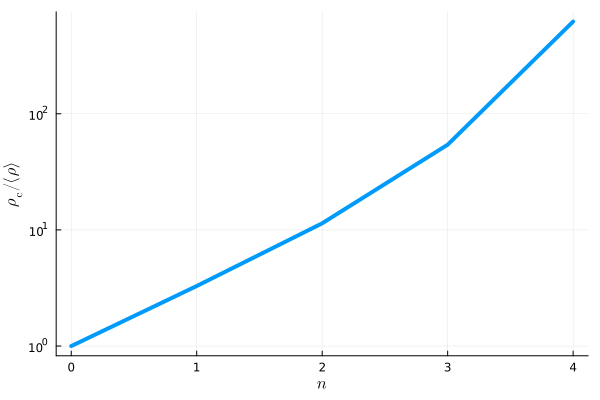

In [101]:
nvals = [0,1,2,3,4]
rhoc_div_rho_avg_vals = rhoc_div_rho_avg.(nvals)

plot(xlabel=L"$n$", ylabel=L"$\rho_\mathrm{c}/\langle \rho \rangle$", yscale=:log)
plot!(nvals, rhoc_div_rho_avg_vals, linewidth=4,label="") #solution for n=1